<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://covidtracking.com/api

In [0]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-11 19:01:58.947417


In [0]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [0]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200510,AK,379.0,26985.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,324.0,C,5/10/2020 14:00,c326467537b8aa4035125d086454fe043009b85a,2020-05-10T20:00:00Z,10.0,NaN,27364,27364,27364,02,0.0,0.0,914.0,1.0,915.0
1,20200510,AL,9777.0,117644.0,NaN,NaN,1240.0,NaN,460.0,NaN,274.0,NaN,B,5/10/2020 00:00,b784245157e15325dbb3d93142f0dd3e69664809,2020-05-10T20:00:00Z,393.0,1240.0,127421,127421,127421,01,5.0,12.0,1717.0,210.0,1927.0
2,20200510,AR,3747.0,61781.0,NaN,64.0,471.0,NaN,NaN,14.0,96.0,2968.0,B,5/10/2020 10:15,38a9c539abfb2c4f9d79d7cf330d67eada846df5,2020-05-10T20:00:00Z,88.0,471.0,65528,65528,65528,05,0.0,0.0,0.0,0.0,0.0
3,20200510,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,5/3/2020 00:00,d66ec1502bd760d9b7e029ada9baca3d2c30db82,2020-05-10T20:00:00Z,0.0,NaN,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,20200510,AZ,11119.0,126620.0,NaN,713.0,1528.0,300.0,NaN,195.0,NaN,2775.0,A+,5/10/2020 00:00,74a1a39b696dae2b812416173663517bf861901e,2020-05-10T20:00:00Z,536.0,1528.0,137739,137739,137739,04,4.0,14.0,8640.0,159.0,8799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609165307f5d60e495d9eaed0e0f3387c7bf8eca,2020-01-26T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3709,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8aa0b13ab29023a1508b6ab3eb78f0f5c9db331,2020-01-25T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3710,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2a78947c0c03661f5387e9e6835cb9643765943a,2020-01-24T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3711,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24102d7fccb764d4f7c6ee847522451af42a7e2b,2020-01-23T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0


In [0]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,20200510,NY,335395.0,847603.0,NaN,7262.0,72715.0,2488.0,NaN,2073.0,NaN,58006.0,A,5/10/2020 00:00,7456280faad8dfbb520eaf338c44a80263063dcd,2020-05-10T20:00:00Z,21478.0,72715.0,1182998,1182998,1182998,36,207.0,460.0,26957.0,2273.0,29230.0
93,20200509,NY,333122.0,820646.0,NaN,7776.0,72255.0,2664.0,NaN,2203.0,NaN,57180.0,B,5/9/2020 00:00,052e6f0369c8bf1cdcb0e87919a4c28dd1bcbc19,2020-05-09T20:00:00Z,21271.0,72255.0,1153768,1153768,1153768,36,226.0,576.0,29510.0,2715.0,32225.0
149,20200508,NY,330407.0,791136.0,NaN,8196.0,71679.0,2811.0,NaN,2295.0,NaN,56378.0,B,5/8/2020 00:00,cce93730cb4bfe975fc7b77442c3b664e71c74ee,2020-05-08T20:00:00Z,21045.0,71679.0,1121543,1121543,1121543,36,217.0,527.0,28869.0,2758.0,31627.0
205,20200507,NY,327649.0,762267.0,NaN,8665.0,71152.0,2976.0,NaN,2425.0,NaN,55547.0,B,5/7/2020 00:00,aa09a1b85d3fc400541054cb2c3d6b8448d876c7,2020-05-07T20:00:00Z,20828.0,71152.0,1089916,1089916,1089916,36,951.0,613.0,30324.0,3671.0,33995.0
261,20200506,NY,323978.0,731943.0,NaN,9179.0,70539.0,NaN,NaN,NaN,NaN,54597.0,B,5/6/2020 00:00,e8a0855be45dbf442e72628a2fce22a1d0e9575d,2020-05-06T20:00:00Z,19877.0,70539.0,1055921,1055921,1055921,36,232.0,672.0,24236.0,2786.0,27022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d5e8dc460e38951e9c4ed83ea6116f3d1ef964e9,2020-03-08T20:00:00Z,NaN,NaN,197,197,197,36,0.0,0.0,0.0,29.0,29.0
3573,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4cc604c6ed1a38fd0eac5f9526682d5eb68a6b96,2020-03-07T21:00:00Z,NaN,NaN,404,168,168,36,0.0,0.0,0.0,43.0,43.0
3613,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a4269189c0f37537baee7e4fd80167aa7237fa7e,2020-03-06T21:00:00Z,NaN,NaN,361,125,125,36,0.0,0.0,16.0,11.0,27.0
3640,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f5fa9d458bf8fb40664458e2710437c5e5a89aaf,2020-03-05T21:00:00Z,NaN,NaN,122,98,98,36,0.0,0.0,28.0,16.0,44.0


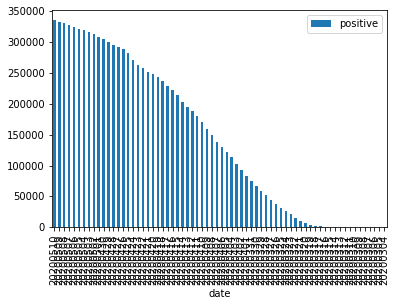

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar')